In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando estilos
sns.set(style="whitegrid")
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
directory = '..\\data\\processed'
parquet_file = [file for file in os.listdir(directory) if file.endswith('.parquet')][0]

In [3]:
parquet_dir = os.path.join(directory, parquet_file)
print(parquet_dir)

..\data\processed\concatenated_dfs.parquet


In [4]:
df = pd.read_parquet(parquet_dir)

# Objetivos da análise

## 1 Ver condição dos dados:
1. Nulos e faltantes - Done
1. Tipo dos dados - Done

# 1. Condição dos dados
## Nulos e faltantes

In [5]:
df.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
for column in df.columns:
    nan_rows = round((df[column].isna().sum()/df.shape[0])*100,2).astype(str)+'%' # type: ignore
    print(f"Column name: {column} has {nan_rows} of NaN values")

Column name: country has 0.02% of NaN values
Column name: description has 0.0% of NaN values
Column name: designation has 29.62% of NaN values
Column name: points has 0.0% of NaN values
Column name: price has 8.08% of NaN values
Column name: province has 0.02% of NaN values
Column name: region_1 has 16.49% of NaN values
Column name: region_2 has 60.32% of NaN values
Column name: taster_name has 63.07% of NaN values
Column name: taster_twitter_handle has 64.84% of NaN values
Column name: title has 53.73% of NaN values
Column name: variety has 0.0% of NaN values
Column name: winery has 0.0% of NaN values


#### Checking data integrity
* Is there any difference between region_1 and region_2 values? - Done
* Rows with no price have at least values of variety or title for later input and treatment? - Done
* The number of taster_name that is NaN came from the 150k dataset? - Useless information, probably we won't be using at the recommendation system
* Which rows has title blank? There is any other information from there? - Done

##### Difference between region_1 and region_2

In [7]:
print(f"Region 1 has {df.region_1.nunique()} unique values")
print(f"Region 2 has {df.region_2.nunique()} unique values")

Region 1 has 1332 unique values
Region 2 has 18 unique values


In [8]:
df[~df['region_2'].isna()].shape[0]

111464

In [9]:
df.loc[(df['region_1']!= df['region_2'] ) & (df['region_2'].notnull()), ['region_1','region_2']]

,region_1,region_2
10,Napa Valley,Napa
12,Alexander Valley,Sonoma
21,Oregon,Oregon Other
23,Paso Robles,Central Coast
25,Sonoma Coast,Sonoma
...,...,...
280860,Santa Ynez Valley,Central Coast
280863,California,California Other
280867,California,California Other
280885,Anderson Valley,Mendocino/Lake Counties


It looks like the values are not the same as region_1, sice it has 100k non null values with different descriptions as region_1

##### NaN Price rows 

In [10]:
df.price.isna().sum()

22691

In [11]:
df_temp = df[df['price'].isna()]
df_temp.sample(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
200691,France,"With 30% Cabernet Franc in the blend, this sho...",None,90,NaN,Bordeaux,Saint-Émilion,None,None,None,None,Bordeaux-style Red Blend,Château Coutet
116405,Italy,"Aromas of toast, oak, espresso and a whiff of ...",Boiolo,88,NaN,Piedmont,Barolo,None,Kerin O’Keefe,@kerinokeefe,Camparo 2011 Boiolo (Barolo),Nebbiolo,Camparo
207092,France,91–93. Barrel sample. Firm tannins guard the r...,Barrel Sample,92,NaN,Bordeaux,Pomerol,None,None,None,None,Bordeaux-style Red Blend,Château la Pointe
233116,France,Pretty notes of purple flowers lead the bouque...,None,89,NaN,Languedoc-Roussillon,Limoux,None,None,None,None,Red Blend,Domaine de Baronarques
48082,Italy,"This offers subtle fruit characteristics, with...",Vigneto Fiorato,88,NaN,Veneto,Recioto della Valpolicella Classico,None,None,None,Tommasi 2008 Vigneto Fiorato (Recioto della V...,"Corvina, Rondinella, Molinara",Tommasi


In [12]:
for column in df.columns:
    nan_rows = round((df_temp[column].isna().sum()/df_temp.shape[0])*100,2).astype(str)+'%' # type: ignore
    print(f"Column name: {column} has {nan_rows} of NaN values")

Column name: country has 0.02% of NaN values
Column name: description has 0.0% of NaN values
Column name: designation has 26.93% of NaN values
Column name: points has 0.0% of NaN values
Column name: price has 100.0% of NaN values
Column name: province has 0.02% of NaN values
Column name: region_1 has 17.14% of NaN values
Column name: region_2 has 97.94% of NaN values
Column name: taster_name has 68.06% of NaN values
Column name: taster_twitter_handle has 68.27% of NaN values
Column name: title has 60.35% of NaN values
Column name: variety has 0.0% of NaN values
Column name: winery has 0.0% of NaN values


Looking for the rows that has no price, we have all of them with variety, winery and points value. In that case we could estimate the price based on [Winery, Variet, and Points values]. Its a guarantee that we can use all of the 22k rows with null prices 

##### Title NaN rows

In [13]:
df.title.isna().sum()

150930

In [14]:
df_temp = df[df['title'].isna()]
df_temp.sample(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
275559,Spain,All the wines in the Abadal line seem commited...,Abadal,89,16.0,Catalonia,Pla de Bages,None,None,None,None,Merlot,Masies d'Avinyo
144731,US,This pure Cabernet is stubbornly unyielding at...,None,90,25.0,Washington,Columbia Valley (WA),Columbia Valley,None,None,None,Cabernet Sauvignon,Fidelitas
139426,US,"This is a candy-jammy Merlot, with flavors of ...",None,84,15.0,California,Sonoma County,Sonoma,None,None,None,Merlot,Cannonball
192057,Spain,"More tan in color than the usual light yellow,...",None,87,20.0,Galicia,Rías Baixas,None,None,None,None,Albariño,Valmiñor
209056,France,"Made from Cabernet Sauvignon, this is a soft, ...",None,86,NaN,Bordeaux,Bordeaux Rosé,None,None,None,None,Rosé,Château Thieuley


In [15]:
for column in df.columns:
    nan_rows = round((df_temp[column].isna().sum()/df_temp.shape[0])*100,2).astype(str)+'%' # type: ignore
    print(f"Column name: {column} has {nan_rows} of NaN values")

Column name: country has 0.0% of NaN values
Column name: description has 0.0% of NaN values
Column name: designation has 30.3% of NaN values
Column name: points has 0.0% of NaN values
Column name: price has 9.07% of NaN values
Column name: province has 0.0% of NaN values
Column name: region_1 has 16.6% of NaN values
Column name: region_2 has 59.62% of NaN values
Column name: taster_name has 100.0% of NaN values
Column name: taster_twitter_handle has 100.0% of NaN values
Column name: title has 100.0% of NaN values
Column name: variety has 0.0% of NaN values
Column name: winery has 0.0% of NaN values


As it has all the taster_name and twitter values NaN, we can assume that most of them came from the 150k dataset. No need for futher investigation

#


## Tipos dos dados

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                280900 non-null  object 
 12  winery                 280901 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


For me is okay, don't need any other treatment for now. Futher, when doing feature engineering, we'll scale, encode variables and gather information from description

## 2 Distribuição dos vinhos com relação a:
1. Pontos e Preço - TbD
1. País e região - TbD
1. Variedade - TbD
1. Winery - TbD
1. Designation - TbD
1. Avaliadores - TbD


## Pontos e preços

In [17]:
#Olhando a distribuição das duas variáveis numéricas que temos disponíveis
df.describe()

,points,price
count,280901.000000,258210.000000
mean,88.146934,34.177162
std,3.151528,38.611708
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,3300.000000


* Valores de pontos distribuiídos entre 80 e 100, com pequena variação
* Preços possuem maior variação e uma grande diferença entre a média e valor máximo (possível incidência de outliers)

### Distribuição dos pontos

* Olhar para as distribuição dos pontos, quartis e quantidades

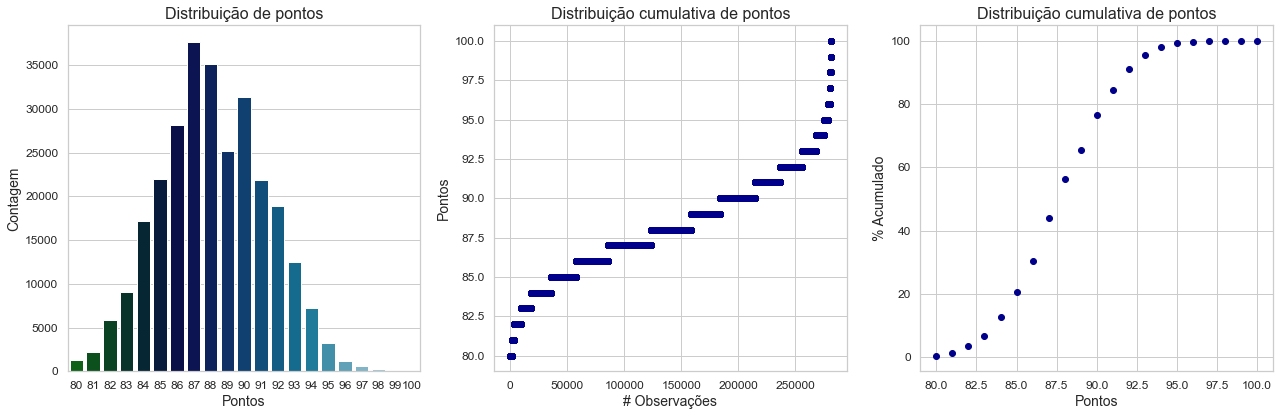

In [18]:

# Calcular a soma acumulada
cum_sum = df.groupby('points').agg(frequency = ('points', 'count')).reset_index()
total = cum_sum.frequency.sum()
cum_sum['cumulative_sum'] = round((cum_sum['frequency'].cumsum()/len(df))*100,2)


#Plotagem
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize= (18,6))

#Primeiro plot - histograma de pontos
sns.countplot(data = df, x = 'points', palette = 'ocean', ax = axes[0])
axes[0].set_title('Distribuição de pontos')
axes[0].set_xlabel('Pontos')
axes[0].set_ylabel('Contagem')
plt.tight_layout()

#Segundo plot - Preços vs nota
axes[1].scatter(data = df.sort_values(by='points', ascending=True), x = range(df.shape[0]) , y = 'points',color = 'darkblue')
axes[1].set_title('Distribuição cumulativa de pontos')
axes[1].set_xlabel('# Observações')
axes[1].set_ylabel('Pontos')

# Terceiro plot
axes[2].scatter(data = cum_sum, x = 'points', y= 'cumulative_sum', color = 'darkblue')
axes[2].set_title('Distribuição cumulativa de pontos')
axes[2].set_xlabel('Pontos')
axes[2].set_ylabel('% Acumulado')
plt.tight_layout()
plt.show()

* A distribuição de pontos se assemelha bastante à uma distribuição normal
* Apenas poucos vinhos tem menos de 82 pontos e mais de 95

##### Tentando agrupar os pontos em categorias a partis dos quantis

In [30]:
quartis = df.points.quantile(q = [.2,.4,.6,.8])
print(quartis)

0.2    85.0
0.4    87.0
0.6    89.0
0.8    91.0
Name: points, dtype: float64


In [29]:
bins = [df['points'].min() - 1] + list(quartis) + [df['points'].max() + 1]
print(bins)

[79, 85.0, 87.0, 89.0, 91.0, 101]


In [39]:
df['points_cluster'] = pd.cut(df['points'], bins=bins)

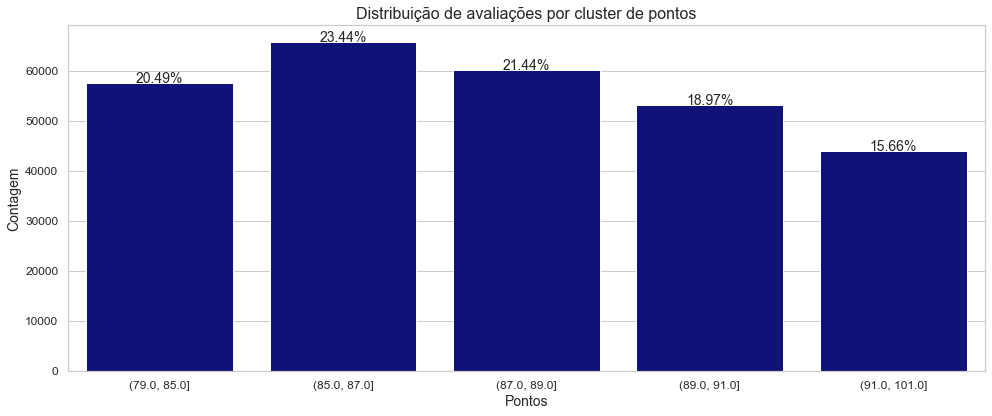

In [40]:
#Primeiro plot - histograma de pontos
total = len(df)
plt.figure(figsize=(14,6))
ax = sns.countplot(data = df, x = 'points_cluster', color = 'darkblue')
ax.set_title('Distribuição de avaliações por cluster de pontos')
ax.set_xlabel('Pontos')
ax.set_ylabel('Contagem')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height,
            '{:1.2f}%'.format(100 * height/total),
            ha="center")
plt.tight_layout()

65% dos dados aproximadamente estão localizados até 89 pontos

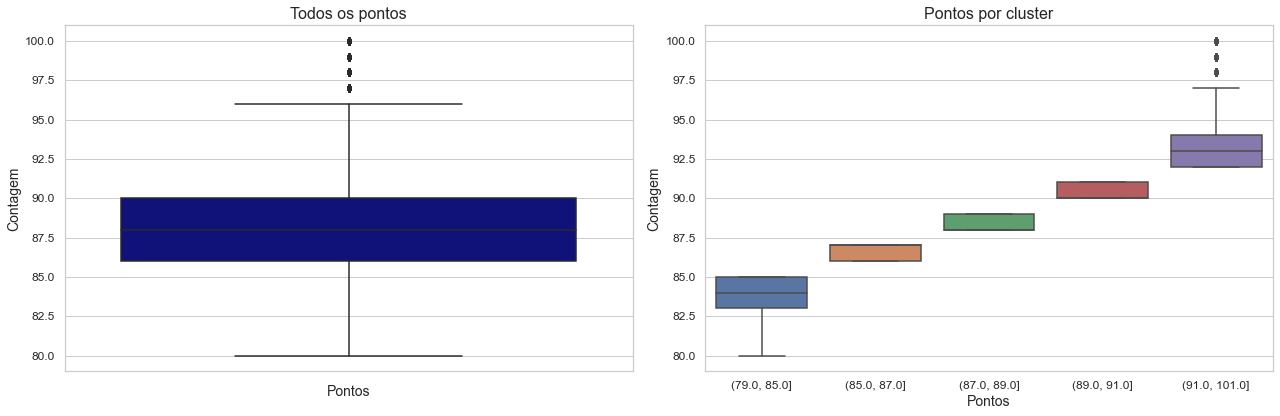

In [55]:
#Plotagem
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize= (18,6))

#Primeiro plot - histograma de pontos
sns.boxplot(data = df, y = 'points',  ax = axes[0], color = 'darkblue')
axes[0].set_title('Todos os pontos')
axes[0].set_xlabel('Pontos')
axes[0].set_ylabel('Contagem')

#Segundo plot - por cluster
sns.boxplot(data = df, y = 'points', x = 'points_cluster',  ax = axes[1])
axes[1].set_title('Pontos por cluster')
axes[1].set_xlabel('Pontos')
axes[1].set_ylabel('Contagem')
plt.tight_layout()

Pelo visto temos alguns outliers presentes na distribuição dos pontos
 - Para isto, vou criar uma função que identifica outliers a partir do interquartil range (IQR)
    - Basicamente vou remover todos os pontos que se encontram abaixo do Q1 - 1.5 IQR e acima de Q3 + 1.5 IQR
    - Sendo Q1 e Q3 os quartis referentes a 25 e 75% da distribuição

In [114]:
def find_outliers_IQR(df, column):

    q1=df[column].quantile(0.25)

    q3=df[column].quantile(0.75)

    IQR=q3-q1

    outliers = df.loc[((df[column]<(q1-1.5*IQR)) | (df[column]>(q3+1.5*IQR)))]

    print('Non-outliers observations: ' + str(len(df)))
    
    print(f'number of outliers observations: {str(len(outliers))}\nIt represents {round(len(outliers)/(len(df)),5)*100}% of the rows available')

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min()))

    return outliers

In [80]:
points_outliers = find_outliers_IQR(df, column = 'points')

Non-outliers observations: 280901
number of outliers observations: 928
It represents 0.33% of the rows available
max outlier value: 100
min outlier value: 97


Todos outliers são valores superiores a 97 pontos, isto é avaliações perfeitamente boas não são um bom indicativo de representatividade dos nossos dados

### Distribuição do preço

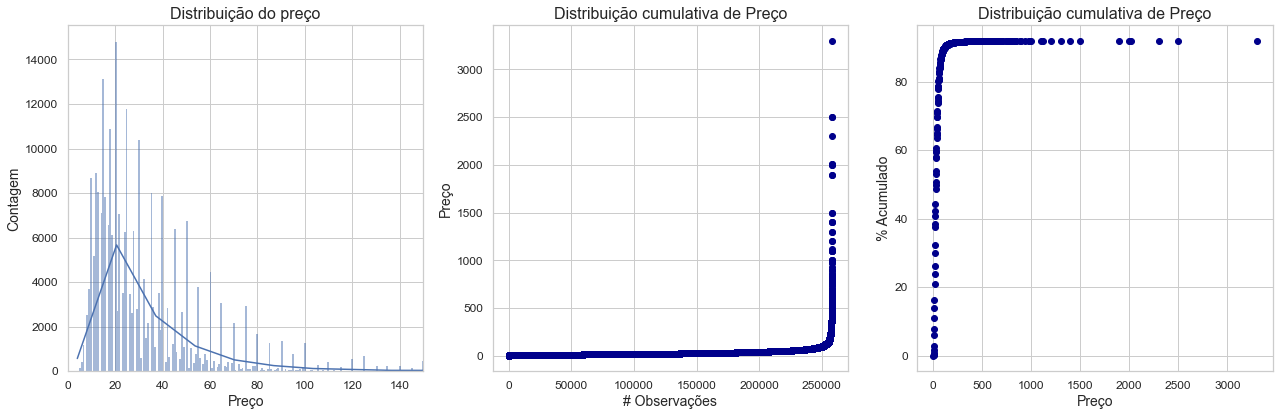

In [214]:

# Calcular a soma acumulada
cum_sum = df.groupby('price').agg(frequency = ('price', 'count')).reset_index()
total = cum_sum.frequency.sum()
cum_sum['cumulative_sum'] = round((cum_sum['frequency'].cumsum()/len(df))*100,2)


#Plotagem
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize= (18,6))

#Primeiro plot - histograma de Preço
sns.histplot(data = df, x = 'price', palette = 'ocean', ax = axes[0], kde = True)

axes[0].set_title('Distribuição do preço')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Contagem')
axes[0].set_xlim([0,150])

#Segundo plot - Preços vs nota
axes[1].scatter(data = df.sort_values(by='price', ascending=True), x = range(df.shape[0]) , y = 'price',color = 'darkblue')
axes[1].set_title('Distribuição cumulativa de Preço')
axes[1].set_xlabel('# Observações')
axes[1].set_ylabel('Preço')

# Terceiro plot
axes[2].scatter(data = cum_sum, x = 'price', y= 'cumulative_sum', color = 'darkblue')
axes[2].set_title('Distribuição cumulativa de Preço')
axes[2].set_xlabel('Preço')
axes[2].set_ylabel('% Acumulado')
plt.tight_layout()
plt.show()

Claramente há outliers presentes nos dados. A grande maioria dos dados se encontram em faixas de valores até 150 reais.

In [115]:
prices_outliers = find_outliers_IQR(df, column = 'price')

Non-outliers observations: 280901
number of outliers observations: 15128
It represents 5.386% of the rows available
max outlier value: country                                                     Uruguay
description       “M” stands for Monumental, and at 15% this is ...
points                                                          100
price                                                        3300.0
province                                               Western Cape
variety                                                   Zinfandel
winery                                          Ökonomierat Rebholz
points_cluster                                        (91.0, 101.0]
dtype: object
min outlier value: country                                                   Argentina
description       ). Vineyard 7&8's Spring Mountain Estate Caber...
points                                                           80
price                                                          77.0
province        

C:\Users\joao.paula\AppData\Local\Temp\ipykernel_21112\56933090.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('max outlier value: '+ str(outliers.max()))
C:\Users\joao.paula\AppData\Local\Temp\ipykernel_21112\56933090.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('min outlier value: '+ str(outliers.min()))


##### Filtrando os dados outliers de preço

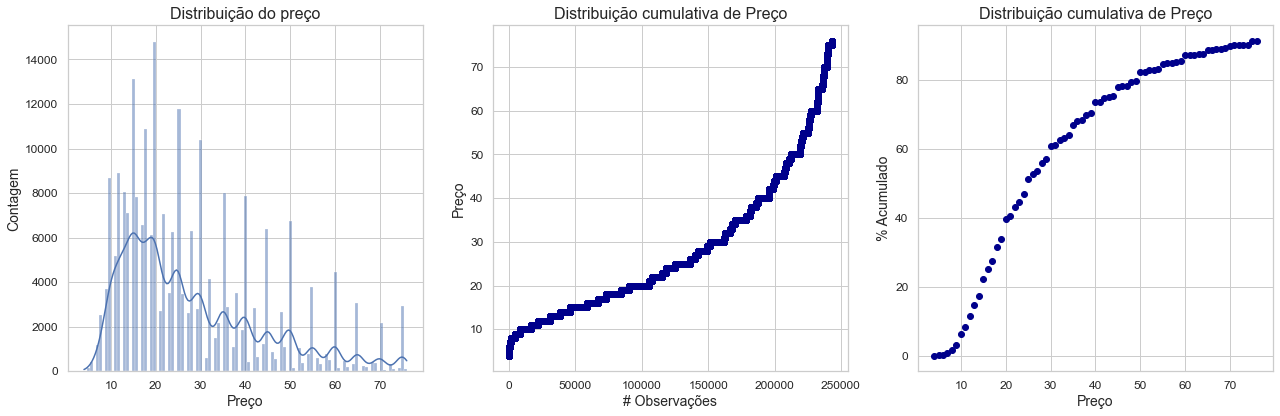

In [122]:

# Calcular a soma acumulada
df_temp_plot = df.drop(prices_outliers.index)
cum_sum = df_temp_plot.groupby('price').agg(frequency = ('price', 'count')).reset_index()
total = cum_sum.frequency.sum()
cum_sum['cumulative_sum'] = round((cum_sum['frequency'].cumsum()/len(df_temp_plot))*100,2)


#Plotagem
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize= (18,6))

#Primeiro plot - histograma de Preço
sns.histplot(data = df_temp_plot, x = 'price', palette = 'ocean', ax = axes[0], kde = True)
axes[0].set_title('Distribuição do preço')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Contagem')


#Segundo plot - Preços vs nota
axes[1].scatter(data = df_temp_plot.sort_values(by='price', ascending=True), x = range(df_temp_plot.shape[0]) , y = 'price',color = 'darkblue')
axes[1].set_title('Distribuição cumulativa de Preço')
axes[1].set_xlabel('# Observações')
axes[1].set_ylabel('Preço')

# Terceiro plot
axes[2].scatter(data = cum_sum, x = 'price', y= 'cumulative_sum', color = 'darkblue')
axes[2].set_title('Distribuição cumulativa de Preço')
axes[2].set_xlabel('Preço')
axes[2].set_ylabel('% Acumulado')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Preço')

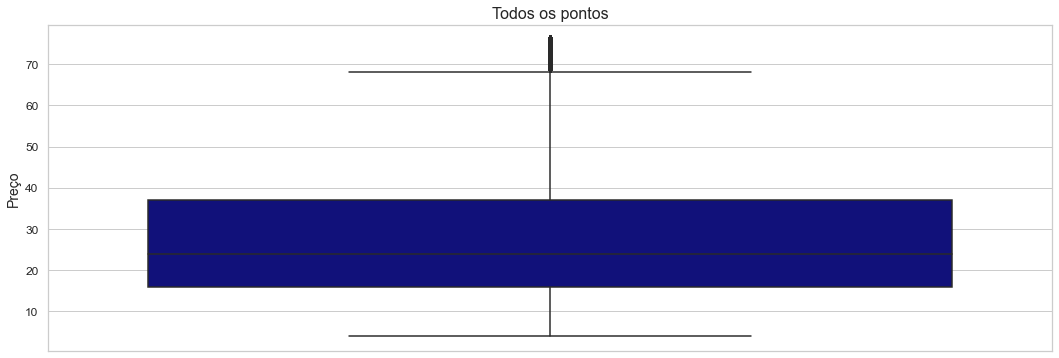

In [129]:
#Plotagem
plt.figure(figsize= (18,6))

#Primeiro plot - histograma de pontos
sns.boxplot(data = df.drop(prices_outliers.index), y = 'price',   color = 'darkblue')
plt.title('Todos os pontos')
plt.ylabel('Preço')

* Mas esses vinhos são únicos? Esses preços outliers são devidos à serem um vinho muito exclusivo?

In [219]:
prices_outliers.loc[(prices_outliers['price']>500), ['designation', 'variety','winery','title','price']].sort_values(by = 'price', ascending = False).sample(10)

,designation,variety,winery,title,price
182245,Essencia,Tokaji,Royal Tokaji,None,544.0
65953,Les Quatre Journaux,Pinot Noir,Louis Latour,Louis Latour 2015 Les Quatre Journaux (Romané...,650.0
69516,None,Bordeaux-style White Blend,Château La Mission Haut-Brion,Château La Mission Haut-Brion 2009 Pessac-Léo...,1000.0
195306,La Cabotte,Chardonnay,Bouchard Père & Fils,None,660.0
164744,None,Merlot,Masseto,None,625.0
154125,None,Bordeaux-style White Blend,Château Haut-Brion,None,800.0
143289,Roger Rose Vineyard,Chardonnay,Blair,None,2013.0
138043,None,Chardonnay,Louis Latour,None,520.0
66926,Tinus,Tempranillo,García Figuero,García Figuero 2012 Tinus (Ribera del Duero),600.0
156267,Clos du Mesnil,Chardonnay,Krug,None,1400.0


In [223]:
# Esse vinho por exemplo é uma classificação única, mesmo sendo outro vinho, ainda o preço está muito diferente.. Me parece que os dados estão controversos e mal preenchidos
df.loc[(df['variety'] == 'Chardonnay') & (df['winery'] == 'Blair') & (df['designation'] == 'Roger Rose Vineyard'), ['designation', 'variety','winery','title','price']]

,designation,variety,winery,title,price
18643,Roger Rose Vineyard,Chardonnay,Blair,Blair 2012 Roger Rose Vineyard Chardonnay (Arr...,28.0
120391,Roger Rose Vineyard,Chardonnay,Blair,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,2013.0
143289,Roger Rose Vineyard,Chardonnay,Blair,None,2013.0


![Alt text](image.png)

- Uma saída para casos como o desse vinho acima, é remover os dados com valors astronômicos...

In [152]:
# Calcular log de price para melhor trabalhar com a feature, minimizando valores outliers 
df['log_price'] = np.log(df.price)

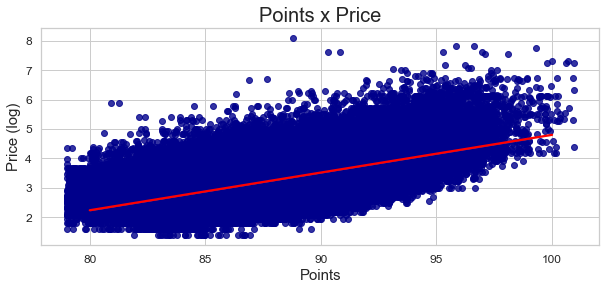

In [153]:
plt.figure(figsize=(10,4))
sns.regplot(x='points', y='log_price', 
                data=df, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkblue')
plt.title("Points x Price", fontsize=20)
plt.xlabel("Points", fontsize= 15)
plt.ylabel("Price (log)", fontsize= 15)

plt.show()

Isso é muito interessante, pois:
- Mostra que vinhos mais caros, não necessariamente são vinhos melhores avaliados
- Os mais caros (vertical) possuem uma pontuação entre 87 e 90 pontos +-
O ideal do sistema de recomendação seria priorizar a qualidade em detrimento do preço, isto achar os melhores vinhos para uma faixa de preço com mesma qualidade ou melhor

------------------------------

### Country

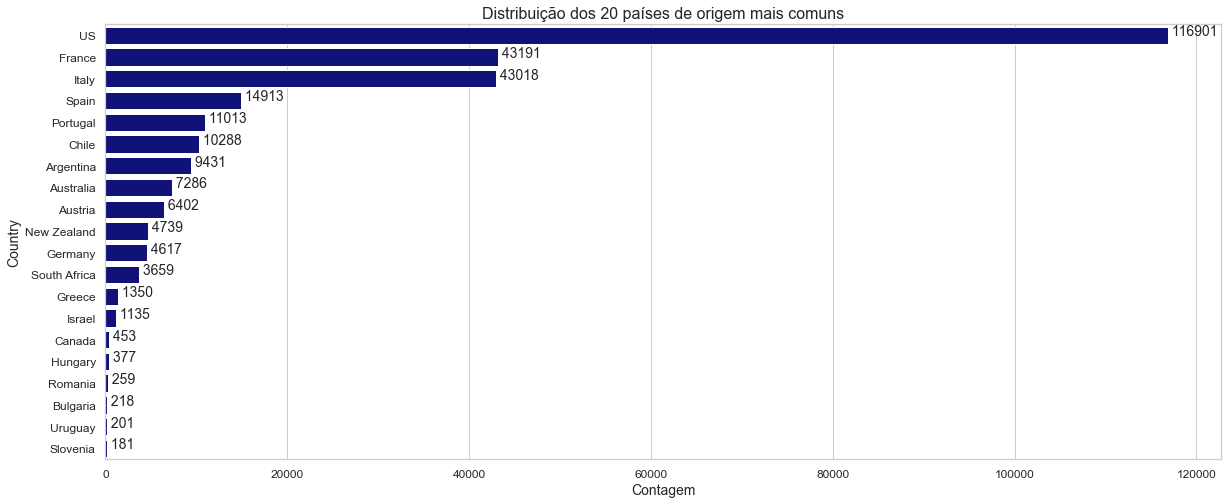

In [167]:
count = df.groupby('country').agg(count_column=('country', 'count')).reset_index().sort_values(by = 'count_column', ascending= False)[:20]
plt.figure(figsize=(20,8))
plt.title('Distribuição dos 20 países de origem mais comuns')
ax = sns.barplot(data=count, x='count_column', y='country', color='darkblue', orient='h')
for index, value in enumerate(count['count_column']):
    ax.text(value, index, f' {value}')
plt.xlabel('Contagem')
plt.ylabel('Country')  # Você tinha 'Country' aqui, mas acho que você quis dizer 'Variety'
plt.show()

In [173]:
round((df.country.value_counts()[:20]/(len(df)))*100,2).astype(str)+'%'

US              41.62%
France          15.38%
Italy           15.31%
Spain            5.31%
Portugal         3.92%
Chile            3.66%
Argentina        3.36%
Australia        2.59%
Austria          2.28%
New Zealand      1.69%
Germany          1.64%
South Africa      1.3%
Greece           0.48%
Israel            0.4%
Canada           0.16%
Hungary          0.13%
Romania          0.09%
Bulgaria         0.08%
Uruguay          0.07%
Slovenia         0.06%
Name: country, dtype: object

EUA França e Italia representam aprox. 70% de toda a produção dos vinhos avaliados. Países como chile argentina pelo visto não possuem uma grande representatividade como esperava

##### Agora o objetivo é olhar para distribuição de notas e preços entre os países

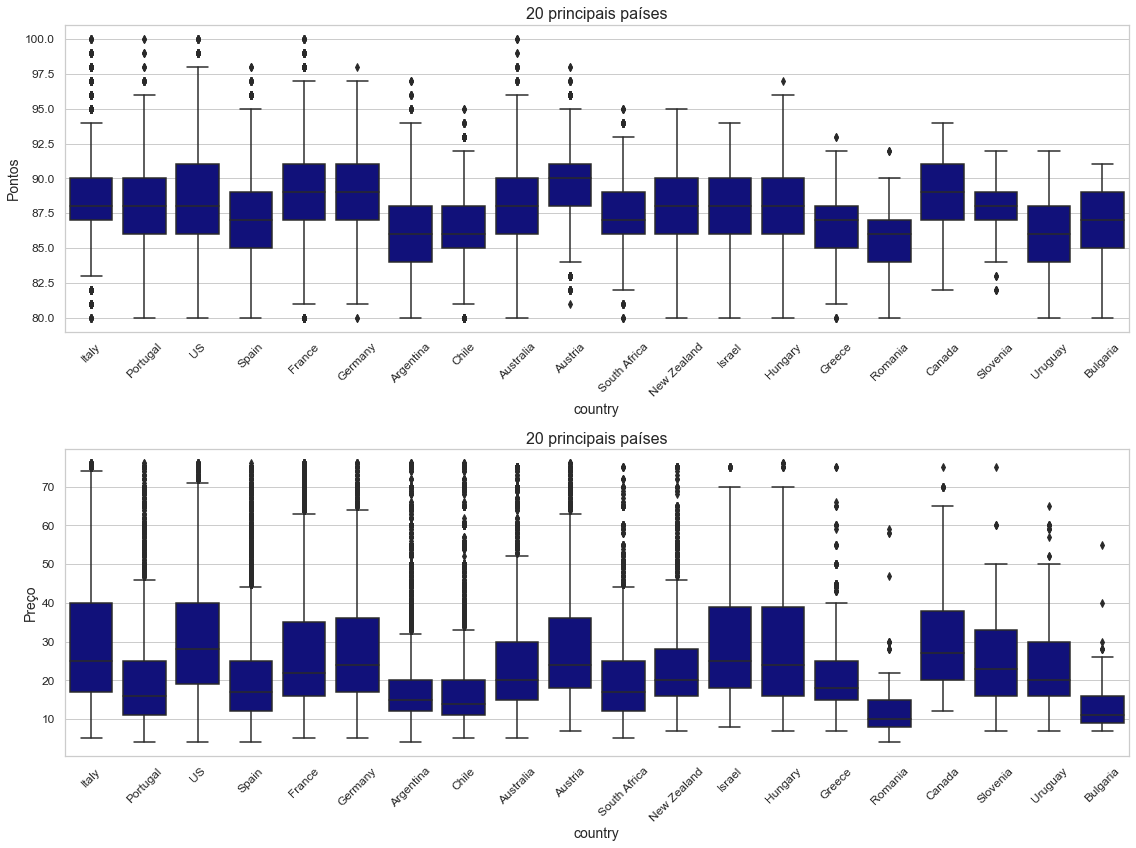

In [225]:
#Top 20 countries
countries_list = df.country.value_counts()[:20].index.values
#Plotagem
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (16,12))
#Primeiro plot - histograma de pontos
axes[0] = sns.boxplot(data = df.loc[df['country'].isin(countries_list)],x = 'country', y = 'points',   color = 'darkblue', ax = axes[0])
axes[0].set_title('20 principais países')
axes[0].set_ylabel('Pontos')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
plt.tight_layout()
#Segundo plot - histograma de preço
axes[1] = sns.boxplot(data = df.drop(prices_outliers.index).loc[df['country'].isin(countries_list)],x = 'country', y = 'price',   color = 'darkblue', ax = axes[1])
axes[1].set_title('20 principais países')
axes[1].set_ylabel('Preço')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.tight_layout()

-----

### Província

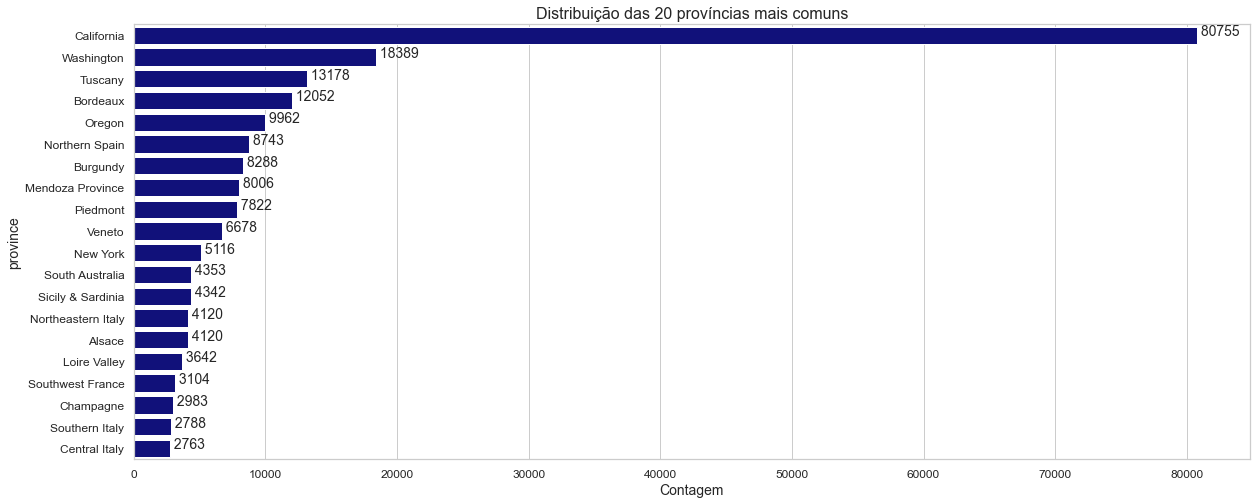

In [201]:
count = df.groupby('province').agg(count_column=('province', 'count')).reset_index().sort_values(by = 'count_column', ascending= False)[:20]
plt.figure(figsize=(20,8))
plt.title('Distribuição das 20 províncias mais comuns')
ax = sns.barplot(data=count, x='count_column', y='province', color='darkblue', orient='h')
for index, value in enumerate(count['count_column']):
    ax.text(value, index, f' {value}')
plt.xlabel('Contagem')
plt.ylabel('province')
plt.show()

In [202]:
round((df.province.value_counts()[:20]/(len(df)))*100,2).astype(str)+'%'

California            28.75%
Washington             6.55%
Tuscany                4.69%
Bordeaux               4.29%
Oregon                 3.55%
Northern Spain         3.11%
Burgundy               2.95%
Mendoza Province       2.85%
Piedmont               2.78%
Veneto                 2.38%
New York               1.82%
South Australia        1.55%
Sicily & Sardinia      1.55%
Alsace                 1.47%
Northeastern Italy     1.47%
Loire Valley            1.3%
Southwest France       1.11%
Champagne              1.06%
Southern Italy         0.99%
Central Italy          0.98%
Name: province, dtype: object

Reforça algumas descobertas vistas na distribuição entre países, visto contribuição elevada de califórnia, Washington DC, Toscana (It), Bordeaux (Fr), etc

##### Agora o objetivo é olhar para distribuição de notas e preços entre os províncias

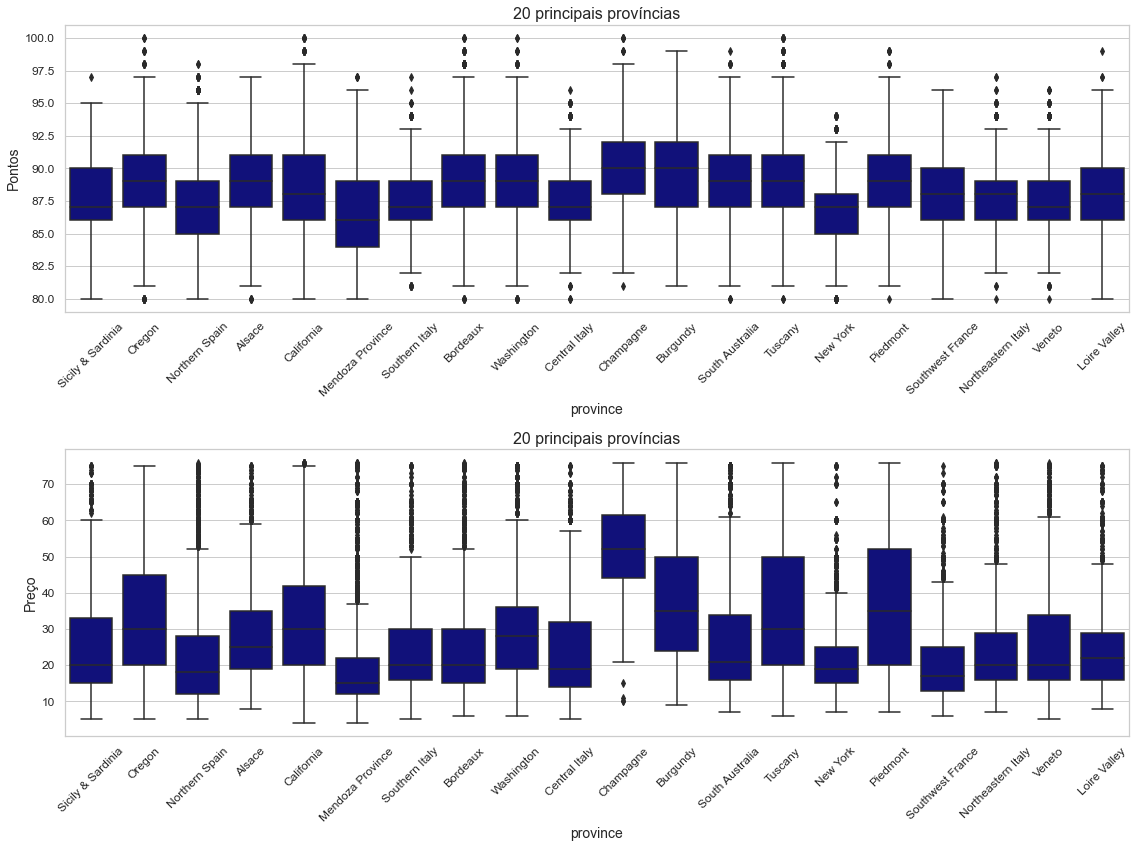

In [203]:
#Top 20 province
countries_list = df.province.value_counts()[:20].index.values
#Plotagem
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (16,12))
#Primeiro plot - histograma de pontos
axes[0] = sns.boxplot(data = df.loc[df['province'].isin(countries_list)],x = 'province', y = 'points',   color = 'darkblue', ax = axes[0])
axes[0].set_title('20 principais províncias')
axes[0].set_ylabel('Pontos')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
plt.tight_layout()
#Segundo plot - histograma de preço
axes[1] = sns.boxplot(data = df.drop(prices_outliers.index).loc[df['province'].isin(countries_list)],x = 'province', y = 'price',   color = 'darkblue', ax = axes[1])
axes[1].set_title('20 principais províncias')
axes[1].set_ylabel('Preço')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.tight_layout()

----

### Variedades

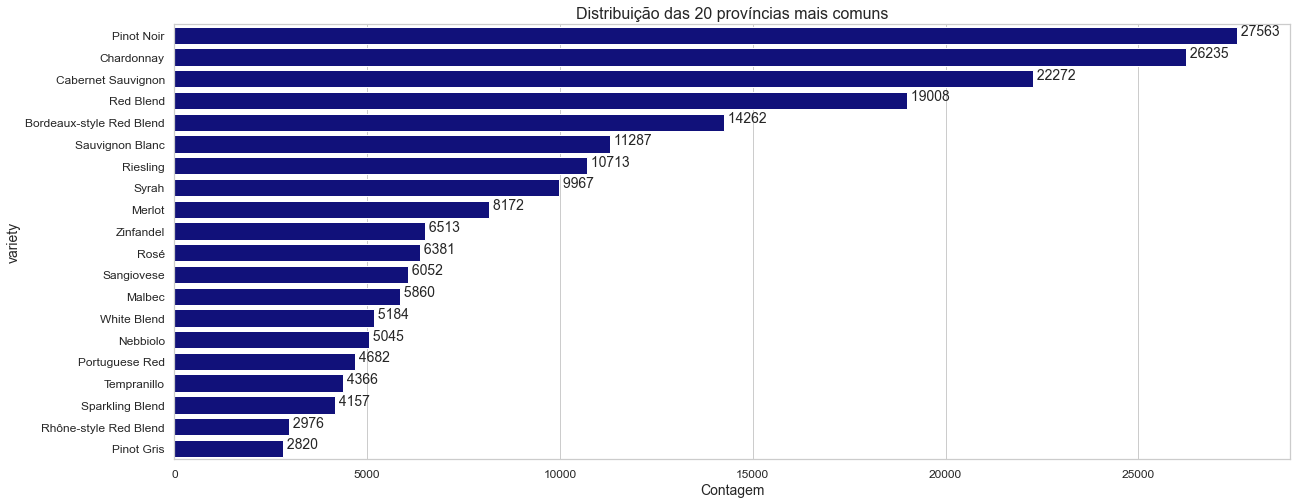

In [204]:
count = df.groupby('variety').agg(count_column=('variety', 'count')).reset_index().sort_values(by = 'count_column', ascending= False)[:20]
plt.figure(figsize=(20,8))
plt.title('Distribuição das 20 províncias mais comuns')
ax = sns.barplot(data=count, x='count_column', y='variety', color='darkblue', orient='h')
for index, value in enumerate(count['count_column']):
    ax.text(value, index, f' {value}')
plt.xlabel('Contagem')
plt.ylabel('variety')
plt.show()

In [205]:
round((df.variety.value_counts()[:20]/(len(df)))*100,2).astype(str)+'%'

Pinot Noir                  9.81%
Chardonnay                  9.34%
Cabernet Sauvignon          7.93%
Red Blend                   6.77%
Bordeaux-style Red Blend    5.08%
Sauvignon Blanc             4.02%
Riesling                    3.81%
Syrah                       3.55%
Merlot                      2.91%
Zinfandel                   2.32%
Rosé                        2.27%
Sangiovese                  2.15%
Malbec                      2.09%
White Blend                 1.85%
Nebbiolo                     1.8%
Portuguese Red              1.67%
Tempranillo                 1.55%
Sparkling Blend             1.48%
Rhône-style Red Blend       1.06%
Pinot Gris                   1.0%
Name: variety, dtype: object

Essas variedades de vinho representam cerca de 70% de toda a base

##### Agora o objetivo é olhar para distribuição de notas e preços entre as variedades

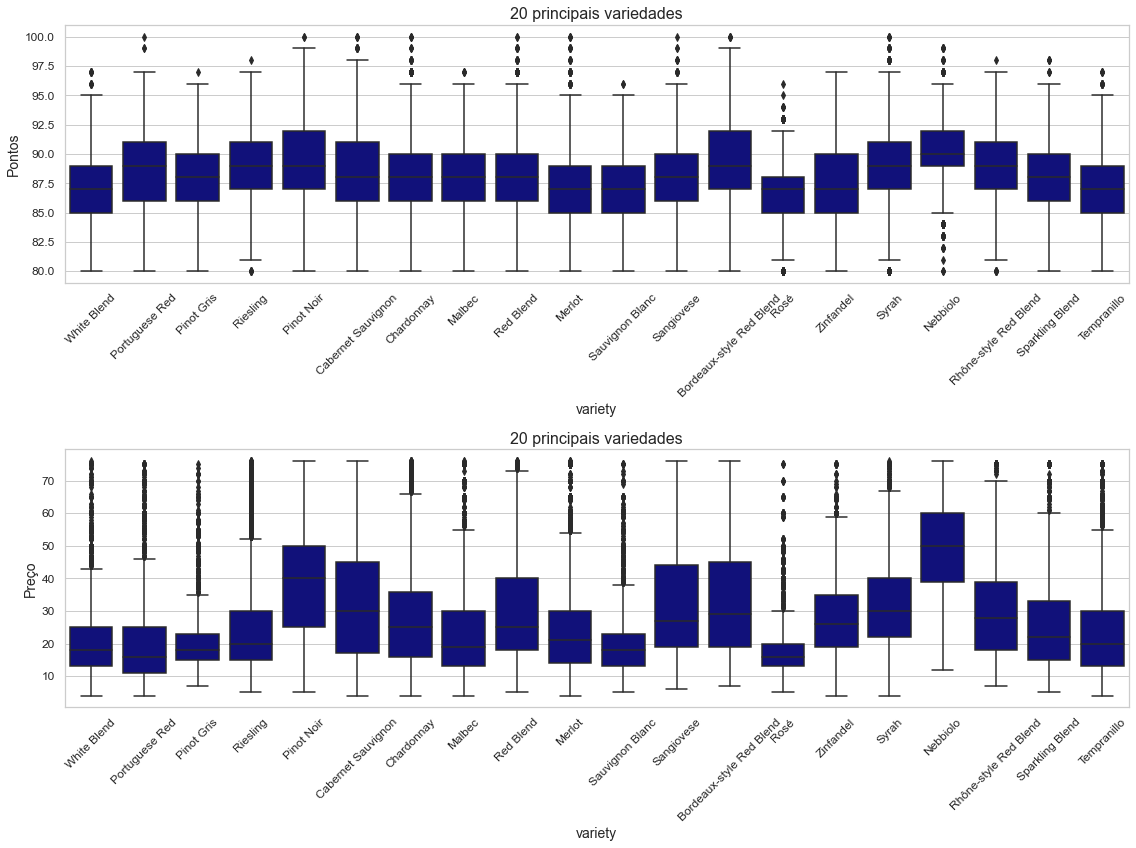

In [208]:
#Top 20 variety
countries_list = df.variety.value_counts()[:20].index.values
#Plotagem
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (16,12))
#Primeiro plot - histograma de pontos
axes[0] = sns.boxplot(data = df.loc[df['variety'].isin(countries_list)],x = 'variety', y = 'points',   color = 'darkblue', ax = axes[0])
axes[0].set_title('20 principais variedades')
axes[0].set_ylabel('Pontos')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
plt.tight_layout()
#Segundo plot - histograma de preço
axes[1] = sns.boxplot(data = df.drop(prices_outliers.index).loc[df['variety'].isin(countries_list)],x = 'variety', y = 'price',   color = 'darkblue', ax = axes[1])
axes[1].set_title('20 principais variedades')
axes[1].set_ylabel('Preço')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.tight_layout()

In [234]:
df.sample(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_cluster,log_price
100320,US,"Showy, dramatic but sophisticated oak nuances ...",Perli Vineyard,91,44.0,California,Mendocino Ridge,None,Jim Gordon,@gordone_cellars,Arista 2014 Perli Vineyard Pinot Noir (Mendoci...,Pinot Noir,Arista,"(89.0, 91.0]",3.784190
27035,France,The wine is ripe with its stalky black-currant...,Terres de Berne,88,24.0,Provence,Côtes de Provence,None,Roger Voss,@vossroger,Château de Berne 2015 Terres de Berne Red (Côt...,Provence red blend,Château de Berne,"(87.0, 89.0]",3.178054
41653,Germany,Fresh sage and tarragon notes lend a lovely gr...,Feinherb,87,30.0,Rheingau,None,None,Anna Lee C. Iijima,None,Baron Knyphausen 2012 Feinherb Riesling (Rhein...,Riesling,Baron Knyphausen,"(85.0, 87.0]",3.401197
248367,US,"Soft and sweet in vanilla, buttered toast and ...",Lot 11,84,10.0,California,California,California Other,None,None,None,Chardonnay,Grayson,"(79.0, 85.0]",2.302585
19196,US,"The blend is 46% Cabernet Sauvignon, 42% Merlo...",Riverbend Red,91,32.0,Washington,Wahluke Slope,Columbia Valley,Paul Gregutt,@paulgwine,Fielding Hills 2005 Riverbend Red Red (Wahluke...,Red Blend,Fielding Hills,"(89.0, 91.0]",3.465736
209462,France,"Soft, fruity and ripe, this is deliciously fla...",None,90,23.0,Burgundy,Pouilly-Fuissé,None,None,None,None,Chardonnay,Château Vitallis,"(89.0, 91.0]",3.135494
132886,Italy,It opens with a floral fragrance of peach blos...,None,90,18.0,Veneto,Soave Classico,None,None,None,None,Garganega,Gini,"(89.0, 91.0]",2.890372
52734,US,"Dry and sour, this has a certain rustic elegan...",Cellar 1879 Blend,84,25.0,California,Napa Valley,Napa,None,None,Markham 2010 Cellar 1879 Blend Red (Napa Valley),Bordeaux-style Red Blend,Markham,"(79.0, 85.0]",3.218876
64648,Portugal,"A soft wine, creamy and ripe. The flavors are ...",Meia Encosta,84,8.0,Dão,None,None,Roger Voss,@vossroger,Borges 2008 Meia Encosta White (Dão),Portuguese White,Borges,"(79.0, 85.0]",2.079442
92333,Spain,"Citrus, green herb and tolerable sweaty aromas...",Ducado de Altan,89,18.0,Northern Spain,Rueda,None,Michael Schachner,@wineschach,Naia 2013 Ducado de Altan Verdejo (Rueda),Verdejo,Naia,"(87.0, 89.0]",2.890372


In [236]:
df.designation.nunique()

47239